In [1]:
from data_io.DataLoader import DataLoader
from models.Visualization import *
from models.Model1 import Model1

import numpy as np

## Load Training Data

In [2]:
dl = DataLoader("/Users/iankurgarg/Code/Vision/Project-1/image-classification/images")

face, non_face = dl.load_data(train=1)

## Visualize Mean and Covariance Matrix

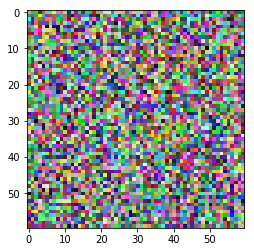

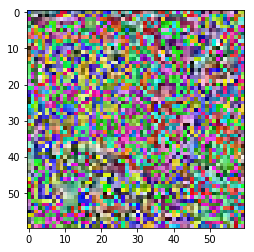

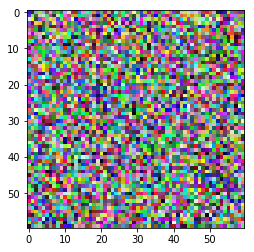

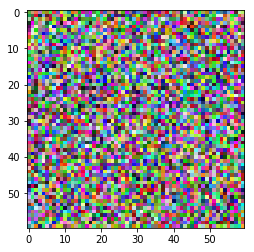

In [4]:
show_mean(face, dim3=3)
show_mean(non_face, dim3=3)
show_cov(face, dim3=3)
show_cov(non_face, dim3=3)

## Fit Model 1 - Single Gaussian Model

In [5]:
m = Model1()
m.fit(face, non_face)

/Users/iankurgarg/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Load Testing Data

In [6]:
test_face, test_non_face = dl.load_data(train=0)
testX = np.concatenate((test_face, test_non_face))
testY = [1]*len(test_face) + [0]*len(test_non_face)

## Predict Labels for Test Data

In [7]:
predicted = m.predict(testX)

print "false_positive_rate = ", m.false_positive_rate(testY, predicted)
print "false_negative_rate = ", m.false_negative_rate(testY, predicted)
print "misclassification_rate = ", m.misclassification_rate(testY, predicted)

false_positive_rate =  0.152542372881
false_negative_rate =  0.0
misclassification_rate =  0.09


## Threshold Variation for ROC

In [ ]:
for thresh in np.arange(0.1, 0.9, 0.1):
	print "thresh = ", thresh
	m.thresh = thresh
	predicted = m.predict(testX)

	print "false_positive_rate = ", m.false_positive_rate(testY, predicted)
	print "false_negative_rate = ", m.false_negative_rate(testY, predicted)
	print "misclassification_rate = ", m.misclassification_rate(testY, predicted)
